#### Amazon baby reviews dataset

https://www.kaggle.com/roopalik/amazon-baby-dataset#reviews_Baby_5_final_dataset.csv

### Install and import libraries

In [6]:
!pip3 install nltk

Correctly generate plurals, singular nouns, ordinals, indefinite articles; convert numbers to words

In [7]:
!pip3 install inflect

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize

In [9]:
#used for lemitization of text 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Word tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load and read datasets from local hard disk and see first five records
It contains reviews of baby products from an ecommerce site (Amazon)

In [11]:
data = pd.read_csv('datasets/reviews_Baby_5_final_dataset.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,helpful_num,helpful_den,reviewText,overall,summary,unixReviewTime,reviewTime,exclamationcount,questioncount,charcount,wordcount,capcount,avgrating,diffrating,ishelpful
0,A3NMPMELAZC8ZY,097293751X,Jakell,"[3, 3]",3,3,This book is perfect! I'm a first time new mo...,5,Great for newborns,1359244800,"01 27, 2013",1,0,250,46,0,4.0,1.0,1
1,A3O4ATU0ENBKTU,097293751X,MAPN,"[1, 1]",1,1,I use this so that our babysitter (grandma) ca...,5,Compact and Easy way to record the milestones,1361836800,"02 26, 2013",0,0,734,148,0,4.0,1.0,1
2,A2SYNL4YX73KNY,097293751X,"R. Davidson ""Jrdpa""","[2, 2]",2,2,"I like this log, but think it would work bette...",3,Needs clearer AM & PM,1369008000,"05 20, 2013",0,0,288,59,2,4.0,1.0,1
3,A2Q2A6JKY95RTP,097293751X,R. Garrelts,"[2, 2]",2,2,My wife and I have a six month old baby boy an...,3,Expensive and Somewhat Limited Format,1381968000,"10 17, 2013",0,0,2959,505,9,4.0,1.0,1
4,A21I33AWNOWMK8,9729375011,EmilyS,"[1, 2]",1,2,I have used this book since my son was born. ...,5,Great product!,1364256000,"03 26, 2013",0,0,595,117,0,4.5,0.5,0


### Shape of our datasets 

In [12]:
data.shape

(56950, 19)

### Take only review text data for sentiment analysis and ignore left columns

In [13]:
data = data[['reviewText']]
data.head()

,reviewText
0,This book is perfect! I'm a first time new mo...
1,I use this so that our babysitter (grandma) ca...
2,"I like this log, but think it would work bette..."
3,My wife and I have a six month old baby boy an...
4,I have used this book since my son was born. ...


### We'll work with just the first 6 documents for now
We can examine the documents in detail to understand how the transformations we will apply work

In [14]:
data = data[:6]

### Shape of dataset after taking fraction of datasets 

In [15]:
data.shape

(6, 1)

### Converted into a list

In [16]:
documents = list(data['reviewText'])

### See our original text data

In [17]:
print(documents[0])

This book is perfect!  I'm a first time new mom, and this book made it so easy to keep track of feedings, diaper changes, sleep.  Definitely would recommend this for new moms.  Plus it's small enough that I throw in the diaper back for doctor visits.


### Word wise tokenization

In [18]:
document_word_tokens = []

for document in documents:
    tokenize_word = word_tokenize(document)

    document_word_tokens.append(tokenize_word)    

In [19]:
print(document_word_tokens[0])

['This', 'book', 'is', 'perfect', '!', 'I', "'m", 'a', 'first', 'time', 'new', 'mom', ',', 'and', 'this', 'book', 'made', 'it', 'so', 'easy', 'to', 'keep', 'track', 'of', 'feedings', ',', 'diaper', 'changes', ',', 'sleep', '.', 'Definitely', 'would', 'recommend', 'this', 'for', 'new', 'moms', '.', 'Plus', 'it', "'s", 'small', 'enough', 'that', 'I', 'throw', 'in', 'the', 'diaper', 'back', 'for', 'doctor', 'visits', '.']


In [20]:
print(document_word_tokens[2])

['I', 'like', 'this', 'log', ',', 'but', 'think', 'it', 'would', 'work', 'better', 'with', 'clearer', 'AM', '&', 'PM', 'sections', '.', 'Each', 'page', 'is', '12', 'hours', 'so', 'you', 'really', 'need', 'two', 'pages', 'a', 'day', 'if', 'your', 'baby', 'feeds', 'or', 'wets', 'a', 'lot', 'in', 'the', 'early', 'morning', 'hours', 'between', 'midnight', 'and', '7am', '.', 'We', "'re", 'cramming', 'those', 'in', 'to', 'the', '2', 'blank', 'spaces', 'above', '7am', 'right', 'now', '.']


### Frequency of each word

In [21]:
from nltk.probability import FreqDist

fdist = FreqDist(document_word_tokens[0])

#### The most common words in this document

In [22]:
fdist.most_common(15)

[(',', 3),
 ('.', 3),
 ('book', 2),
 ('I', 2),
 ('new', 2),
 ('this', 2),
 ('it', 2),
 ('diaper', 2),
 ('for', 2),
 ('This', 1),
 ('is', 1),
 ('perfect', 1),
 ('!', 1),
 ("'m", 1),
 ('a', 1)]

#### Visualize the frequencies of the words

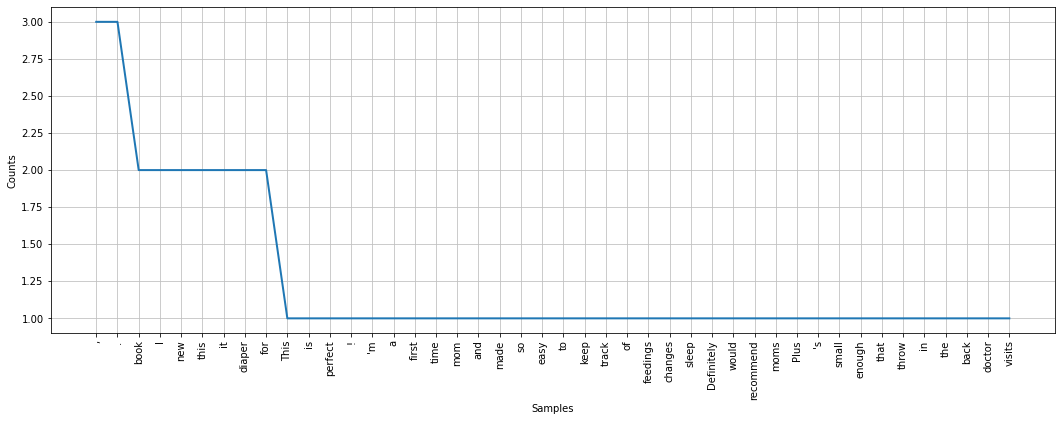

In [23]:
plt.figure(figsize=(18, 6))

fdist.plot(cumulative=False)

plt.show()

### Normalization

In [24]:
import re, string, unicodedata
import nltk
import inflect

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [25]:
def to_lowercase(documents):
    
    documents_list = []
    
    for document in documents:
        new_word = document.lower()
        documents_list.append(new_word)
        
    return documents_list

### Remove punctuation

The regular expression [^\w\s] means "not alphanumeric or whitespace"
* ^ translates to NOT
* \w denotes an alphanumeric character
* \s represents whitespace

In [26]:
def remove_punctuation(documents):
    
    documents_list = []
    
    for document in documents:
        
        new_word = re.sub('[^\w\s]', '', document)
        
        if new_word != '':
            documents_list.append(new_word)
            
    return documents_list

In [27]:
def replace_numbers(documents):
    
    documents_list = []
    inf_engine = inflect.engine()
    
    for document in documents:
        
        final_word_list = []
        words = document.split()
        
        for word in words:
            
            if word.isdigit():
                final_word_list.append(inf_engine.number_to_words(word))
            else:
                final_word_list.append(word)
        
        documents_list.append(" ".join(final_word_list))
        
    return documents_list

In [28]:
def lemmatize_verbs(documents):
    
    lemmatizer = WordNetLemmatizer()
    documents_list = []
    
    for document in documents:
        
        final_word_list = []
        words = document.split()
        
        for word in words:
            final_word_list.append(lemmatizer.lemmatize(word, pos='v'))
        
        documents_list.append(" ".join(final_word_list))
        
    return documents_list

In [29]:
def normalization(documents):
    
    documents = to_lowercase(documents)
    
    documents = remove_punctuation(documents)
    
    documents = replace_numbers(documents)
    
    documents = lemmatize_verbs(documents)
    
    return documents

In [30]:
documents[2]

"I like this log, but think it would work better with clearer AM & PM sections. Each page is 12 hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am. We're cramming those in to the 2 blank spaces above 7am right now."

In [31]:
lowercase_docs = to_lowercase(documents)

lowercase_docs[2]

"i like this log, but think it would work better with clearer am & pm sections. each page is 12 hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am. we're cramming those in to the 2 blank spaces above 7am right now."

In [32]:
punc_removed_docs = remove_punctuation(lowercase_docs)

punc_removed_docs[2]

'i like this log but think it would work better with clearer am  pm sections each page is 12 hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the 2 blank spaces above 7am right now'

In [33]:
nums_replaced_docs = replace_numbers(punc_removed_docs)

nums_replaced_docs[2]

'i like this log but think it would work better with clearer am pm sections each page is twelve hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the two blank spaces above 7am right now'

In [34]:
docs_to_lemmatize = ['These pretzels are making me thirsty', 
                     'Sometimes the road less traveled is less traveled for a reason. I love travelling', 
                     'It is not a lie if you believe it. She is in the habit of lying']
    
lemmatize_verbs(docs_to_lemmatize)

['These pretzels be make me thirsty',
 'Sometimes the road less travel be less travel for a reason. I love travel',
 'It be not a lie if you believe it. She be in the habit of lie']

In [35]:
lemmatized_docs = replace_numbers(nums_replaced_docs)

lemmatized_docs[2]

'i like this log but think it would work better with clearer am pm sections each page is twelve hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the two blank spaces above 7am right now'

In [36]:
documents = normalization(documents)

documents[2]

'i like this log but think it would work better with clearer be pm section each page be twelve hours so you really need two page a day if your baby feed or wet a lot in the early morning hours between midnight and 7am be cram those in to the two blank space above 7am right now'

## Vectorization
#### i) CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(documents)

CountVectorizer()

In [38]:
count_vectorizer.vocabulary_

{'this': 319,
 'book': 39,
 'be': 29,
 'perfect': 246,
 'im': 153,
 'first': 109,
 'time': 324,
 'new': 213,
 'mom': 198,
 'and': 18,
 'make': 189,
 'it': 164,
 'so': 294,
 'easy': 89,
 'to': 327,
 'keep': 169,
 'track': 330,
 'of': 221,
 'feed': 104,
 'diaper': 76,
 'change': 50,
 'sleep': 291,
 'definitely': 73,
 'would': 361,
 'recommend': 267,
 'for': 111,
 'moms': 200,
 'plus': 252,
 'its': 165,
 'small': 292,
 'enough': 94,
 'that': 309,
 'throw': 322,
 'in': 156,
 'the': 311,
 'back': 27,
 'doctor': 81,
 'visit': 342,
 'use': 338,
 'our': 234,
 'babysitter': 26,
 'grandma': 127,
 'can': 46,
 'what': 352,
 'go': 125,
 'on': 225,
 'during': 84,
 'day': 71,
 'weve': 351,
 'record': 268,
 'many': 190,
 'milestones': 197,
 'since': 288,
 'we': 347,
 'receive': 266,
 'six': 289,
 'month': 201,
 'diary': 77,
 'have': 135,
 'room': 273,
 'note': 218,
 'wish': 358,
 'hours': 144,
 'start': 302,
 'around': 21,
 'until': 336,
 'eight': 91,
 'pm': 253,
 'but': 43,
 'just': 168,
 'write': 36

In [39]:
len(count_vectorizer.vocabulary_)

367

### Fit and transform of document

In [40]:
doc_terms = count_vectorizer.fit_transform(documents)

doc_terms.shape

(6, 367)

### Assign unique number to the word

In [41]:
print('(Doc, WordIndex.): NumOccurences')

print(doc_terms)

(Doc, WordIndex.): NumOccurences
  (0, 319)	3
  (0, 39)	2
  (0, 29)	1
  (0, 246)	1
  (0, 153)	1
  (0, 109)	1
  (0, 324)	1
  (0, 213)	2
  (0, 198)	1
  (0, 18)	1
  (0, 189)	1
  (0, 164)	1
  (0, 294)	1
  (0, 89)	1
  (0, 327)	1
  (0, 169)	1
  (0, 330)	1
  (0, 221)	1
  (0, 104)	1
  (0, 76)	2
  (0, 50)	1
  (0, 291)	1
  (0, 73)	1
  (0, 361)	1
  (0, 267)	1
  :	:
  (5, 75)	1
  (5, 173)	1
  (5, 65)	2
  (5, 177)	3
  (5, 230)	1
  (5, 287)	1
  (5, 280)	1
  (5, 110)	2
  (5, 120)	3
  (5, 216)	1
  (5, 180)	1
  (5, 339)	1
  (5, 106)	1
  (5, 312)	1
  (5, 150)	1
  (5, 186)	1
  (5, 124)	1
  (5, 131)	1
  (5, 143)	1
  (5, 242)	1
  (5, 175)	1
  (5, 116)	1
  (5, 248)	1
  (5, 133)	1
  (5, 256)	1


In [42]:
doc_terms[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 

#### Find the words corresponding to the word index
get_feature_names() returns the list of all the words which make up the vocabulary in the form of a list. The index of a word corresonds to the index in this list.

The word with index 336 appears 3 times in document 0. What is the word?

In [43]:
count_vectorizer.get_feature_names()[336]

'until'

### Stopwords
A collection of stopwords for different languages is available here: <br />
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/stopwords.zip

In [44]:
stop_words_df = pd.read_csv("datasets/stopwords/english", 
                            engine='python', 
                            header=None,
                            usecols=[0], 
                            names=['words'])

In [45]:
stop_words_df.sample(10)

,words
49,be
104,why
68,as
124,too
1,me
118,not
133,should
89,down
75,with
70,while


In [46]:
stop_words = set(stop_words_df.words.unique())

In [47]:
count_vectorizer = CountVectorizer(stop_words=stop_words)

count_vectorizer.fit(documents)

CountVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [48]:
count_vectorizer.vocabulary_

{'book': 28,
 'perfect': 199,
 'im': 127,
 'first': 90,
 'time': 266,
 'new': 178,
 'mom': 166,
 'make': 158,
 'easy': 71,
 'keep': 138,
 'track': 270,
 'feed': 86,
 'diaper': 62,
 'change': 36,
 'sleep': 242,
 'definitely': 59,
 'would': 290,
 'recommend': 220,
 'moms': 168,
 'plus': 205,
 'small': 243,
 'enough': 76,
 'throw': 264,
 'back': 19,
 'doctor': 66,
 'visit': 278,
 'use': 275,
 'babysitter': 18,
 'grandma': 107,
 'go': 105,
 'day': 57,
 'weve': 286,
 'record': 221,
 'many': 159,
 'milestones': 165,
 'since': 239,
 'receive': 219,
 'six': 240,
 'month': 169,
 'diary': 63,
 'room': 226,
 'note': 182,
 'wish': 288,
 'hours': 120,
 'start': 251,
 'around': 15,
 'eight': 73,
 'pm': 206,
 'write': 291,
 'certain': 35,
 'suit': 254,
 'purpose': 213,
 'nice': 179,
 'thing': 259,
 'rough': 227,
 'night': 180,
 'super': 256,
 'tire': 268,
 'something': 245,
 'refer': 222,
 'forget': 92,
 'last': 141,
 'baby': 17,
 'wake': 279,
 'also': 12,
 'like': 150,
 'front': 98,
 'page': 191,
 '

In [49]:
len(count_vectorizer.vocabulary_)

294

### __ii TfidfVectorizer__

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

tfidf_vectorizer.fit(documents)

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [52]:
tfidf_vectorizer.vocabulary_

{'book': 28,
 'perfect': 199,
 'im': 127,
 'first': 90,
 'time': 266,
 'new': 178,
 'mom': 166,
 'make': 158,
 'easy': 71,
 'keep': 138,
 'track': 270,
 'feed': 86,
 'diaper': 62,
 'change': 36,
 'sleep': 242,
 'definitely': 59,
 'would': 290,
 'recommend': 220,
 'moms': 168,
 'plus': 205,
 'small': 243,
 'enough': 76,
 'throw': 264,
 'back': 19,
 'doctor': 66,
 'visit': 278,
 'use': 275,
 'babysitter': 18,
 'grandma': 107,
 'go': 105,
 'day': 57,
 'weve': 286,
 'record': 221,
 'many': 159,
 'milestones': 165,
 'since': 239,
 'receive': 219,
 'six': 240,
 'month': 169,
 'diary': 63,
 'room': 226,
 'note': 182,
 'wish': 288,
 'hours': 120,
 'start': 251,
 'around': 15,
 'eight': 73,
 'pm': 206,
 'write': 291,
 'certain': 35,
 'suit': 254,
 'purpose': 213,
 'nice': 179,
 'thing': 259,
 'rough': 227,
 'night': 180,
 'super': 256,
 'tire': 268,
 'something': 245,
 'refer': 222,
 'forget': 92,
 'last': 141,
 'baby': 17,
 'wake': 279,
 'also': 12,
 'like': 150,
 'front': 98,
 'page': 191,
 '

### See IDF Score

In [53]:
df = pd.DataFrame(tfidf_vectorizer.idf_, 
                  index=tfidf_vectorizer.get_feature_names(),
                  columns=['IDF Score'])

df.sort_values(by=['IDF Score']).head(10)

,IDF Score
track,1.154151
feed,1.154151
change,1.336472
page,1.336472
would,1.336472
diaper,1.336472
day,1.336472
baby,1.336472
really,1.559616
book,1.559616


In [54]:
df.sort_values(by=['IDF Score']).tail(10)

,IDF Score
grandparents,2.252763
great,2.252763
half,2.252763
hand,2.252763
handy,2.252763
happend,2.252763
hardback,2.252763
helpful,2.252763
frustrate,2.252763
youd,2.252763


#### Vectors for each document
The sparse matrix contains a row for each document and contains the tf-idf scores for each word in the vocabulary

In [55]:
tfidf_vectors = tfidf_vectorizer.fit_transform(documents)

tfidf_vectors

<6x294 sparse matrix of type '<class 'numpy.float64'>'
	with 388 stored elements in Compressed Sparse Row format>

#### The vector for the first document

In [56]:
tfidf_vectors[0].todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.17278637,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.29175625, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.12500647, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.14587813,
         0.        , 0.        , 0.25001294, 0.        , 0.        ,
         0.        , 0.17278637, 0.        , 0.        , 0.        ,
         0.        , 0.14587813, 0

#### The word "book" is #28 in the vocabulary
We check out its tf-idf weights for each of the 6 documents

In [57]:
tfidf_vectorizer.get_feature_names()[28]

'book'

In [58]:
tfidf_vectors[:, 28].todense()

matrix([[0.29175625],
        [0.16944489],
        [0.        ],
        [0.        ],
        [0.0960694 ],
        [0.        ]])

#### Take one more look at the first document

In [59]:
documents[0]

'this book be perfect im a first time new mom and this book make it so easy to keep track of feed diaper change sleep definitely would recommend this for new moms plus its small enough that i throw in the diaper back for doctor visit'

#### Examine the vectors for the first doc

In [60]:
first_vector = tfidf_vectors[0]

In [61]:
df = pd.DataFrame(first_vector.T.todense(), 
                  index=tfidf_vectorizer.get_feature_names(), 
                  columns=["TF-IDF Weight"])

In [62]:
df.sort_values(by=["TF-IDF Weight"]).tail(10)

,TF-IDF Weight
back,0.172786
throw,0.210711
perfect,0.210711
enough,0.210711
visit,0.210711
moms,0.210711
plus,0.210711
diaper,0.250013
book,0.291756
new,0.421423


#### Words with a score of zero for this document
These appear in other documents in the corpus but not in the first one

In [63]:
df.sort_values(by=["TF-IDF Weight"]).head(10)

,TF-IDF Weight
24hour,0.0
nitpick,0.0
note,0.0
notebook,0.0
often,0.0
okay,0.0
old,0.0
one,0.0
ones,0.0
open,0.0
